# A toy problem test of different probabilistic deep learning techniques

In [1]:
# Load necessary packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
import seaborn as sns

In [2]:
# Global random state
rng = np.random.default_rng(seed=12)

In [3]:
# Set seaborn style
custom_params = {
    "axes.spines.right": False, "axes.spines.top": False, "axes.edgecolor":"black", 
    "xtick.bottom":True, "ytick.left":True, #"axes.grid.axis":"y",
    #"axes.linewidth":1
}
sns.set_theme(style="white", rc=custom_params)

## Problem 1: (Simple non)-Linear data

Begin by creating simple dummy data

In [4]:
from sklearn.datasets import make_regression

#### Functions for creating linear data and train/test splitting

In [462]:
#from scipy.stats import norm
def create_linear_data(low, high, num_samples, coeff, rng=np.random.default_rng(), x_increase=None):
    x = rng.uniform(low, high, size=num_samples)
    x.sort()
    noise_coeff =  1 if x_increase is None else x*x_increase
    noise = rng.normal(size=num_samples) * noise_coeff
    y = -1/10 * x**3 + x**2 + x*coeff + noise
    return x, y

In [415]:
# Create training and test set
def create_train_test_split(x, y, train_size=0.7):
    train_size = 0.7
    pos = int(np.ceil(num_samples*train_size))
    rand_ind = rng.permutation(np.arange(num_samples))
    idx_train = rand_ind[:pos]
    idx_test = rand_ind[pos:]
    x_train = x[idx_train]
    y_train = y[idx_train]
    x_test = x[idx_test]
    y_test = y[idx_test]
    return x_train, x_test, y_train, y_test

#### Create data

<AxesSubplot: >

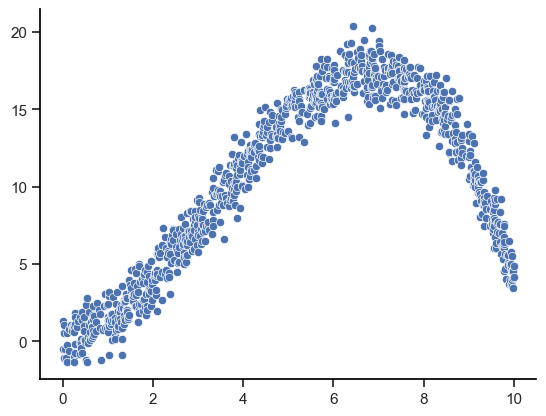

In [728]:
low = 0
high = 10
num_samples = 1000
coeff = 0.4
x_increase = None # Set none if noise should not increase with x
x, y = create_linear_data(low=low, high=high, num_samples=num_samples, coeff=coeff, rng=rng, x_increase=x_increase)
sns.scatterplot(x=x, y=y)

In [723]:
train_size = 0.7
x_train, x_test, y_train, y_test = create_train_test_split(x, y, train_size=train_size)

### Deterministic network (regular)

#### Activation function comparisons

Evaluation (mse)
Relu 100 epochs
10/10 [==============================] - 0s 1ms/step - loss: 14.1138
14.113767623901367

Elu 100 epochs
10/10 [==============================] - 0s 2ms/step - loss: 3.1734
3.173363447189331

Relu 500 epochs
10/10 [==============================] - 0s 1ms/step - loss: 1.1958
1.1957592964172363


<AxesSubplot: >

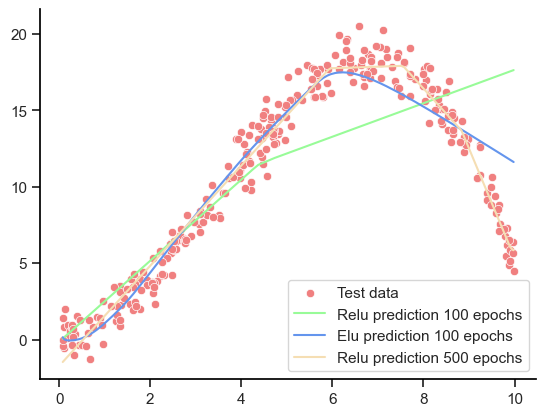

In [524]:
detmod = tf.keras.models.Sequential([
    tf.keras.layers.Dense(
        input_shape=(1,),
        units=16,
        activation=tf.nn.relu,
    ),
    tf.keras.layers.Dense(
        units=16,
        activation=tf.nn.relu
    ),
    tf.keras.layers.Dense(1)
])
detmod.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
detmod.fit(x_train, y_train, verbose=0, epochs=100)

detmod_elu = tf.keras.models.Sequential([
    tf.keras.layers.Dense(
        input_shape=(1,),
        units=16,
        activation=tf.nn.elu,
        kernel_initializer="he_normal"
    ),
    tf.keras.layers.Dense(
        units=16,
        activation=tf.nn.elu,
        kernel_initializer="he_normal"
    ),
    tf.keras.layers.Dense(1)
])

detmod_elu.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
detmod_elu.fit(x_train, y_train, verbose=0, epochs=100)

print("Evaluation (mse)")
print()
print("Relu 100 epochs")
print(f'{detmod.evaluate(x_test, y_test)}')
print()
print("Elu 100 epochs")
print(f'{detmod_elu.evaluate(x_test, y_test)}')
print()
sns.scatterplot(x=x_test, y=y_test, color="lightcoral", label="Test data")
sns.lineplot(x=x_test, y=np.squeeze(detmod(x_test)), color="palegreen", label="Relu prediction 100 epochs")
sns.lineplot(x=x_test, y=np.squeeze(detmod_elu(x_test)), color="cornflowerblue", label="Elu prediction 100 epochs")



detmod.fit(x_train, y_train, verbose=0, epochs=500)
print("Relu 500 epochs")
print(f'{detmod.evaluate(x_test, y_test)}')
sns.lineplot(x=x_test, y=np.squeeze(detmod(x_test)), color="wheat", label="Relu prediction 500 epochs")


#### Importance of weight initializers for ELU activation

Evaluation (mse)

Elu with glorot initializer
10/10 [==============================] - 0s 1ms/step - loss: 6.7709
6.770946502685547

Elu with he normal initializer
10/10 [==============================] - 0s 2ms/step - loss: 1.7745
1.774478793144226


<AxesSubplot: >

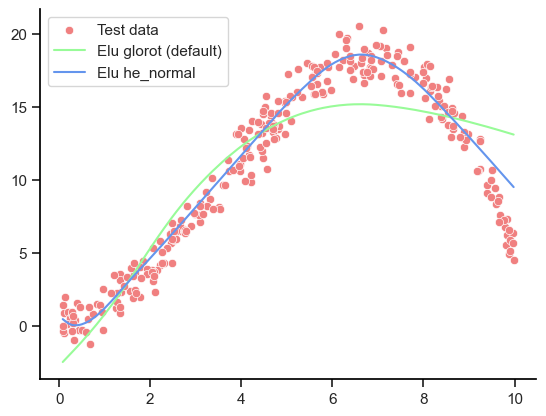

In [523]:
elu = tf.keras.models.Sequential([
    tf.keras.layers.Dense(
        input_shape=(1,),
        units=16,
        activation=tf.nn.elu,
    ),
    tf.keras.layers.Dense(
        units=16,
        activation=tf.nn.elu
    ),
    tf.keras.layers.Dense(1)
])
elu.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
elu.fit(x_train, y_train, verbose=0, epochs=100)

he_elu = tf.keras.models.Sequential([
    tf.keras.layers.Dense(
        input_shape=(1,),
        units=16,
        activation=tf.nn.elu,
        kernel_initializer="he_normal"
    ),
    tf.keras.layers.Dense(
        units=16,
        activation=tf.nn.elu,
        kernel_initializer="he_normal"
    ),
    tf.keras.layers.Dense(1)
])

he_elu.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
he_elu.fit(x_train, y_train, verbose=0, epochs=100)

print("Evaluation (mse)")
print()
print("Elu with glorot initializer")
print(f'{elu.evaluate(x_test, y_test)}')
print()
print("Elu with he normal initializer")
print(f'{he_elu.evaluate(x_test, y_test)}')
sns.scatterplot(x=x_test, y=y_test, color="lightcoral", label="Test data")
sns.lineplot(x=x_test, y=np.squeeze(elu(x_test)), color="palegreen", label="Elu glorot (default)")
sns.lineplot(x=x_test, y=np.squeeze(he_elu(x_test)), color="cornflowerblue", label="Elu he_normal")

#### Depth vs wideness

Evaluation (mse)

1x128 layer with 193 parameters
10/10 [==============================] - 0s 1ms/step - loss: 11.5269
11.526884078979492

3x8 layers with 169 parameters
10/10 [==============================] - 0s 1ms/step - loss: 1.3475
1.3474833965301514


<AxesSubplot: >

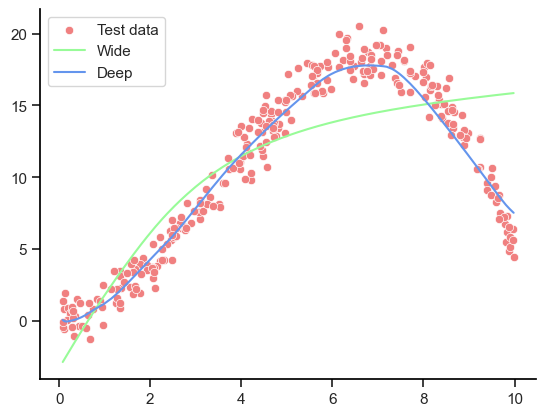

In [530]:
elu_wide = tf.keras.models.Sequential([
    tf.keras.layers.Dense(
        input_shape=(1,),
        units=64,
        activation=tf.nn.elu,
    ),
    tf.keras.layers.Dense(1)
])
elu_wide.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
elu_wide.fit(x_train, y_train, verbose=0, epochs=100)

elu_deep = tf.keras.models.Sequential([
    tf.keras.layers.Dense(
        input_shape=(1,),
        units=8,
        activation=tf.nn.elu,
        kernel_initializer="he_normal"
    ),
    tf.keras.layers.Dense(
        units=8,
        activation=tf.nn.elu,
        kernel_initializer="he_normal"
    ),
    tf.keras.layers.Dense(
        units=8,
        activation=tf.nn.elu,
        kernel_initializer="he_normal"
    ),
    tf.keras.layers.Dense(1)
])

elu_deep.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
elu_deep.fit(x_train, y_train, verbose=0, epochs=100)

print("Evaluation (mse)")
print()
print(f"1x128 layer with {elu_wide.count_params()} parameters")
print(f'{elu_wide.evaluate(x_test, y_test)}')
print()
print(f"3x8 layers with {elu_deep.count_params()} parameters")
print(f'{elu_deep.evaluate(x_test, y_test)}')
sns.scatterplot(x=x_test, y=y_test, color="lightcoral", label="Test data")
sns.lineplot(x=x_test, y=np.squeeze(elu_wide(x_test)), color="palegreen", label="Wide")
sns.lineplot(x=x_test, y=np.squeeze(elu_deep(x_test)), color="cornflowerblue", label="Deep")

### Epistemic network

#### Specify model, prior and posterior distributions

In [720]:
# Create normally distributed prior with zero mean, 1 std
def prior(kernel_size, bias=0, dtype=None):
    n = kernel_size + bias
    return tfp.layers.DistributionLambda(
        lambda t: tfp.distributions.Normal(loc=tf.zeros(n), scale=tf.ones(n))
    )

# Create normally distributed learnable posterior 
def posterior(kernel_size, bias=0, dtype=None):
    n = kernel_size + bias
    return tf.keras.models.Sequential([
        tfp.layers.VariableLayer(2*n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfp.distributions.Independent(
            tfp.distributions.Normal(loc=t[..., :n], 
                                     scale=1e-3 + 0.003 * tf.nn.softplus(t[..., n:])),
                reinterpreted_batch_ndims=1))
    ])
    #return tf.keras.models.Sequential([
    #    tfp.layers.VariableLayer(tfp.layers.IndependentNormal.params_size(n)),
    #    tfp.layers.IndependentNormal(n)
    #])

def make_model(x_train_size, activation=None):
    model = tf.keras.Sequential([
        tfp.layers.DenseVariational(
            input_shape=(1,),
            units=64, 
            make_prior_fn=prior, 
            make_posterior_fn=posterior, 
            kl_weight = 1/(x_train_size),
            activation=activation
        ),
        tfp.layers.DenseVariational(
            units=1, 
            make_prior_fn=prior, 
            make_posterior_fn=posterior, 
            kl_weight = 1/(x_train_size),
        )
    ])
    return model

#### Train and predict

In [625]:
def plot_epistemic_uncertainty(
    model, x_test, x_train, y_test, y_train,
    num_ensembles, test_color='lightcoral', pred_color='deepskyblue', 
    train_color='royalblue', plot_train=False, scale=False
):
    predictions = np.zeros(shape=(num_ensembles, y_test.shape[0]))
    for i in range(num_ensembles):
        if not scale:
            predictions[i] = np.squeeze(model(x_test[:, None]))
        else:
            scaled_x = StandardScaler().fit_transform(x_test[:, None])
            predictions[i] = np.squeeze(model(scaled_x))
    sns.scatterplot(x=x_test, y=y_test, color=test_color, label="Test data")
    if plot_train:
        sns.scatterplot(x=x_train, y=y_train, color=train_color, label="Train data", marker="*")
    # Plot ensemble mean
    sns.lineplot(x=x_test, y=predictions.mean(axis=0), label="Ensemble mean", color="red", linewidth=3)
    for i, pred in enumerate(predictions):
        label = "Test predictions" if i == 0 else None
        sns.lineplot(x=x_test, y=pred, color=pred_color, label=label, alpha=0.3)

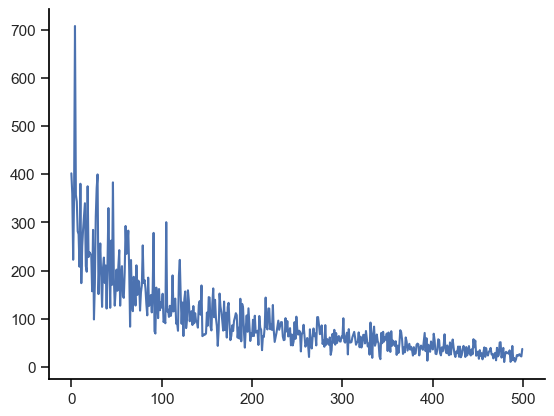

In [724]:
model = make_model(x_train.shape[0], activation=tf.nn.elu)
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))

num_epochs = 500
hist = model.fit(x_train[:, None], y_train[:, None], epochs=num_epochs, verbose=0)
plt.plot(range(num_epochs), hist.history["loss"])
minl = min(hist.history["loss"])
maxl = max(hist.history["loss"])
if maxl - minl > 1000:
    plt.yscale("log")

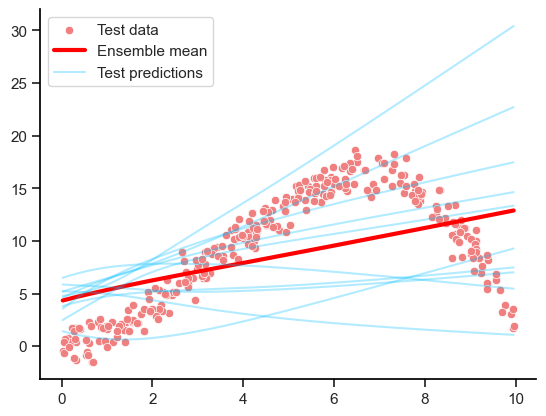

In [725]:
plot_epistemic_uncertainty(
    model=model, x_test=x_test, x_train=x_train, 
    y_test=y_test, y_train=y_train, num_ensembles=10, plot_train=False)

## Problem 2: s curves

In [483]:
from sklearn.datasets import make_s_curve

<AxesSubplot: >

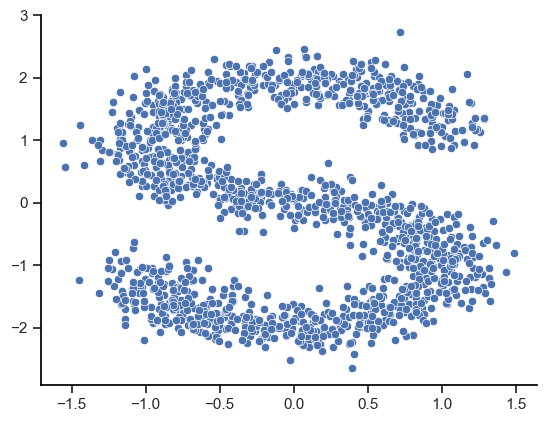

In [484]:
n_samples = 1500
points, points_color = make_s_curve(n_samples=n_samples, random_state=12, noise=0.2)
x,_, y = points.T
sns.scatterplot(x=x, y=y)

## Problem 3: Complex non-linear

### Create dummy data

In [ ]:
# Create function
def load_dataset(n, w0, b0, x_low, x_high):
    def s(x):
        g = (x - x_low) / (x_high - x_low)
        return 3 * (0.25 + g**2)
    def f(x, w, b):
        return w * x * (1. + np.sin(x)) + b
    x = (x_high - x_low) * rng.random(n) + x_low  # N(x_low, x_high)
    x = np.sort(x)
    eps = np.random.randn(n) * s(x)
    y = f(x, w0, b0) + eps
    return x, y
n_data = 500
n_train = 400
w0 = 0.125
b0 = 5.0
x_low, x_high = -20, 60

X, y = load_dataset(n_data, w0, b0, x_low, x_high)

In [702]:
# Generation of x samples
# Generate n sorted numbers in the interval [low, high] from the uniform distribution
num_samples = 500
low = 0
high = 40
x = rng.uniform(low=low, high=high, size=num_samples)
x.sort()

In [703]:
# Generation of y samples
# Goal: becomes more spread out/noisy as x increases
noise = rng.normal(size=num_samples) * (1 + (x/2))
period_div = 3
y = x*(1+np.sin(x/period_div)) + noise

<AxesSubplot: >

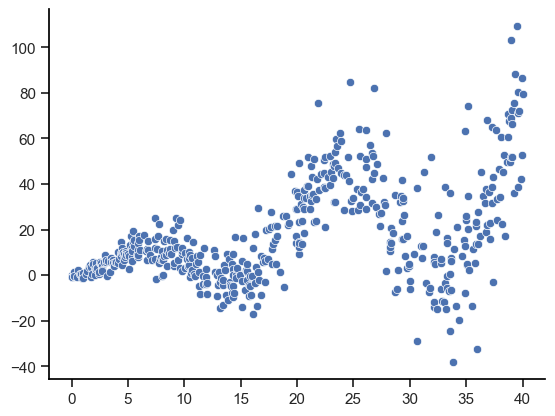

In [704]:
# Plot result
sns.scatterplot(x=x, y=y)

In [707]:
# Preprocess
data = np.stack([x, y])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, y_train = shuffle(x_train, y_train, random_state=12)
x_train = x_train[:, None]
y_train = y_train[:, None]
x_train_scaled = StandardScaler().fit_transform(x_train, y_train)
x_test_scaled = StandardScaler().fit_transform(x_test[:, None])
#train_data = tf.data.Dataset.from_tensor_slices(np.stack([x_train, y_train]))
#train_data = train_data.shuffle(buffer_size=350).prefetch(1)

### Regular network
Note: I am using the `selu` activation function, which requires `lecun_normal` weight/kernel initialization. This activation function is recommended in the book, but it does NOT self-normalize the network when regularization techniques and non-sequential networks are employed.

In [ ]:
# Cycling learning rate

class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        tf.keras.backend.set_value(self.model.optimizer.learning_rate, rate)
        
#onecycle = OneCycleScheduler(np.ceil(len(x_train) / batch_size) * n_epochs, max_rate=0.1, start_rate=1e-3)
#history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size,
#                    callbacks=[onecycle], verbose=0)

In [497]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [608]:
# Regular network
batch_size = 32
n_epochs = 500
lr = 1e-3


callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=(1,), activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(units=32, activation="elu", kernel_initializer="he_normal"),
    #tf.keras.layers.Dense(units=64, activation="elu", kernel_initializer="he_normal"),
    #tf.keras.layers.Dense(units=32, activation="elu", kernel_initializer="he_normal"),
    #tf.keras.layers.AlphaDropout(rate=0.1),
    tf.keras.layers.Dense(1)#, activation="elu", kernel_initializer="he_normal")
])
tf.keras.optimizers.schedules.LearningRateSchedule
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr), metrics=["mse"])

hist = model.fit(x_train_scaled, y_train, batch_size=batch_size, epochs=n_epochs, verbose=0, callbacks=[callback])

Number of epochs: 480
Minimum mse: 184.1465301513672
Previous best: 0.9929540157318115


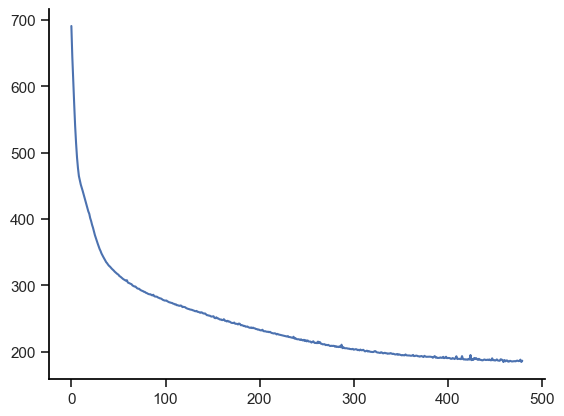

In [609]:
mm = min(hist.history["mse"])
try:
    if mm < best_mm:        
        best_mm = mm
except NameError:
    best_mm = np.inf
finally:
    if mm < best_mm:        
        best_mm = mm
print(f'Number of epochs: {len(hist.epoch)}')
print(f'Minimum mse: {mm}\nPrevious best: {best_mm}')
plt.plot(range(len(hist.epoch)), hist.history["mse"]);

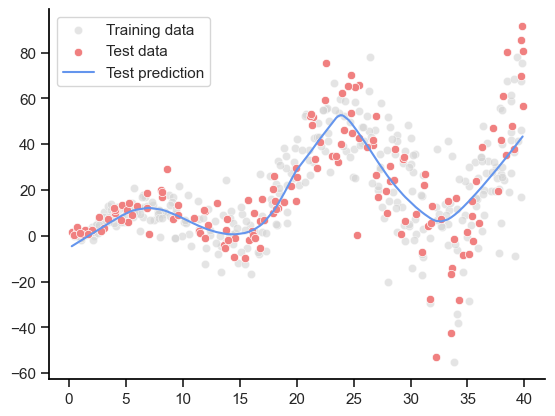

In [610]:
# Plot performance on test set
y_pred = np.squeeze(model(x_test_scaled))  # NOTE THE model() SYNTAX! OTHERWISE NO DISTRIBUTION IS ACHIEVED
sns.scatterplot(x=x_train.squeeze(), y=y_train.squeeze(), color="lightgray", label="Training data", alpha=0.6)
sns.scatterplot(x=x_test, y=y_test, color="lightcoral", label="Test data")
sns.lineplot(x=x_test, y=y_pred, color="cornflowerblue", label="Test prediction")
plt.legend();

### Aleatoric model
Note: The aleatoric model needs many more epochs to reflect the actual uncertainty. This can be demonstrated in the final plotting, comparing models trained on different number of epochs.

In [611]:
# Aleatoric model
def neg_log_likelihood_with_dist(y_true, y_pred):
    return -tf.reduce_mean(y_pred.log_prob(y_true))

def build_aleatoric_model():
    inputs = tf.keras.Input(shape=(1,))
    x = tf.keras.layers.Dense(units=64, activation="elu", kernel_initializer="he_normal")(inputs)
    x = tf.keras.layers.Dense(units=32, activation="elu", kernel_initializer="he_normal")(x)
    mean = tf.keras.layers.Dense(1)(x)
    stddev = tf.keras.layers.Dense(1)(x)
    
    output = tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(loc=t[0], 
                                           scale=1e-7 + tf.math.softplus(1e-3 * t[1]))
                                          )([mean, stddev])
    model = tf.keras.Model(inputs, output)
    return model

Final loss: 400.3549499511719


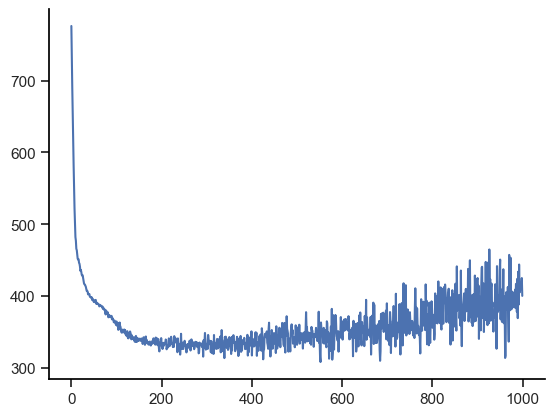

In [708]:
# Train and plot metric
batch_size = 32
n_epochs = 1000
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
lr = 1e-3
al = build_aleatoric_model()
al.compile(loss=neg_log_likelihood_with_dist, optimizer=tf.keras.optimizers.Adam(lr), metrics=["mse"])
history = al.fit(x=x_train_scaled, y=y_train, batch_size=batch_size, epochs=n_epochs, verbose=0, callbacks=[callback])
plt.plot(range(len(history.epoch)), history.history["mse"])
print(f'Final loss: {history.history["mse"][-1]}')

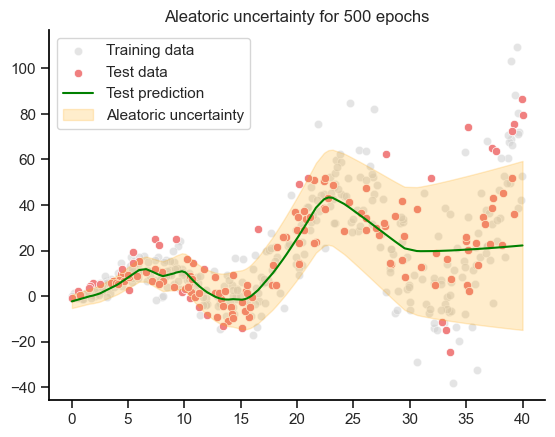

In [709]:
# Plot uncertainty
pr = al(x_test_scaled)  # NOTE THE model() SYNTAX! OTHERWISE NO DISTRIBUTION IS ACHIEVED
mean = pr.mean()
std = pr.stddev()
fig, ax = plt.subplots()
# Get sorted indices for plotting
ind = np.argsort(x_test)
sns.scatterplot(x=x_train.squeeze(), y=y_train.squeeze(), color="lightgray", label="Training data", ax=ax, alpha=0.6)
sns.scatterplot(x=x_test, y=y_test, color="lightcoral", label="Test data", ax=ax)
sns.lineplot(x=x_test, y=np.squeeze(mean), color="green", label="Test prediction", ax=ax)
ax.fill_between(
    x_test[ind], 
    np.squeeze(mean + 2*std)[ind],
    np.squeeze(mean - 2*std)[ind],
    color="orange", alpha=0.2,
    label="Aleatoric uncertainty"
)
plt.legend()
ax.set_title("Aleatoric uncertainty for 500 epochs");

#### Comparing the number of epochs

In [615]:
# Quick epoch comparison of both models
batch_size = 32
n_epochs = 100
lr = 1e-3


#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=)
q1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=(1,), activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(units=32, activation="selu", kernel_initializer="lecun_normal"),
    #tf.keras.layers.Dense(units=32, activation="selu", kernel_initializer="lecun_normal"),
    #tf.keras.layers.Dropout(rate=0.0),
    tf.keras.layers.Dense(1)
])

q1.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr), metrics=["mse"])

hist_q1 = model.fit(x_train_scaled, y_train, batch_size=batch_size, epochs=n_epochs, verbose=0)

q2 = build_aleatoric_model()
q2.compile(loss=neg_log_likelihood_with_dist, optimizer=tf.keras.optimizers.Adam(lr), metrics=["mse"])
hist_q2 = q2.fit(x=x_train_scaled, y=y_train, batch_size=batch_size, epochs=n_epochs, verbose=0)

In [616]:
# Run one with 1000 epochs
q3 = build_aleatoric_model()
q3.compile(loss=neg_log_likelihood_with_dist, optimizer=tf.keras.optimizers.Adam(lr), metrics=["mse"])
hist_q3 = q3.fit(x=x_train_scaled, y=y_train, batch_size=batch_size, epochs=1000, verbose=0)

Mean squared error for each model:
Deterministic 100 mse: 990.326904296875
Probabilistic 100 mse: 738.5921630859375
Probabilistic 500 mse: 819.7357177734375
Probabilistic 1000 mse: 832.8428955078125


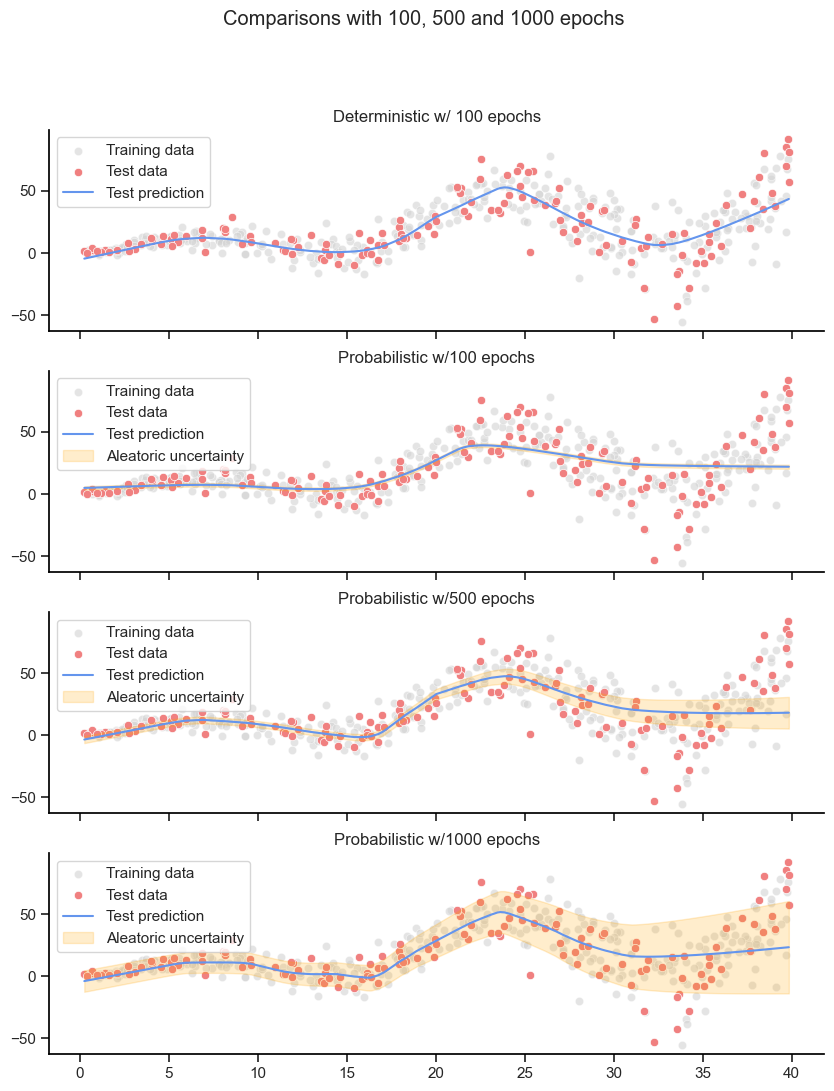

In [619]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True, sharey=True)

# Make predictions
det_pred = q1(x_test_scaled)
al_pred = q2(x_test_scaled)
al_pred_mean = al_pred.mean()
al_pred_std = al_pred.stddev()

long_al_pred = q3(x_test_scaled)
long_al_pred_mean = long_al_pred.mean()
long_al_pred_std = long_al_pred.stddev()

# Print mse
print("Mean squared error for each model:")
mse = tf.keras.losses.MeanSquaredError()
models = [det_pred, al_pred_mean, mean, long_al_pred_mean]
names = ["Deterministic 100", "Probabilistic 100", "Probabilistic 500", "Probabilistic 1000"]
for m, n in zip(models, names):
    print(f'{n} mse: {mse(y_test, m)}')

# Plot training and test data
for ax in axs:
    sns.scatterplot(x=x_train.squeeze(), y=y_train.squeeze(), color="lightgray", label="Training data", ax=ax, alpha=0.6)
    sns.scatterplot(x=x_test, y=y_test, color="lightcoral", label="Test data", ax=ax)

# Plot deterministic predictions
sns.lineplot(x=x_test, y=y_pred.squeeze(), color="cornflowerblue", label="Test prediction", ax=axs[0])

# Plot aleatoric predictions with 100 epochs
ind = np.argsort(x_test)
sns.lineplot(x=x_test, y=np.squeeze(al_pred_mean), color="cornflowerblue", label="Test prediction", ax=axs[1])
axs[1].fill_between(
    x_test[ind], 
    np.squeeze(al_pred_mean + 2*al_pred_std)[ind],
    np.squeeze(al_pred_mean - 2*al_pred_std)[ind],
    color="orange", alpha=0.2,
    label="Aleatoric uncertainty"
)
axs[1].legend()
# Plot aleatoric predictions with 500 epochs
sns.lineplot(x=x_test, y=np.squeeze(mean), color="cornflowerblue", label="Test prediction", ax=axs[2])
axs[2].fill_between(
    x_test[ind], 
    np.squeeze(mean + 2*std)[ind],
    np.squeeze(mean - 2*std)[ind],
    color="orange", alpha=0.2,
    label="Aleatoric uncertainty"
)
axs[2].legend()

sns.lineplot(x=x_test, y=np.squeeze(long_al_pred_mean), color="cornflowerblue", label="Test prediction", ax=axs[3])
axs[3].fill_between(
    x_test[ind], 
    np.squeeze(long_al_pred_mean + 2*long_al_pred_std)[ind],
    np.squeeze(long_al_pred_mean - 2*long_al_pred_std)[ind],
    color="orange", alpha=0.2,
    label="Aleatoric uncertainty"
)
axs[3].legend()
ax.set_title("Aleatoric uncertainty for 500 epochs")
fig.suptitle("Comparisons with 100, 500 and 1000 epochs")
axs[0].set_title("Deterministic w/ 100 epochs")
axs[1].set_title("Probabilistic w/100 epochs")
axs[2].set_title("Probabilistic w/500 epochs")
axs[3].set_title("Probabilistic w/1000 epochs");

### Epistemic model w / variational inference

In [ ]:
print(np.log(np.expm1(1)))
print(np.log(np.e -1))

In [647]:
def prior_trainable(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    return tf.keras.Sequential([
      #tfp.layers.VariableLayer(n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfp.distributions.Independent(
          tfp.distributions.Normal(loc=tf.zeros(n), scale=tf.ones(n)),
          reinterpreted_batch_ndims=1)),
    ])

def prior(kernel_size, bias=0, dtype=None):
    n = kernel_size + bias
    return tfp.layers.DistributionLambda(
        lambda t: tfp.distributions.Normal(loc=tf.zeros(n), scale=tf.ones(n))
    )

# Specify the surrogate posterior over `keras.layers.Dense` `kernel` and `bias`.
def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.))
    return tf.keras.Sequential([
      tfp.layers.VariableLayer(2 * n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfp.distributions.Independent(
          tfp.distributions.Normal(loc=t[..., :n],
                     scale=1e-3 + 0.005*tf.nn.softplus(c + t[..., n:])),
          reinterpreted_batch_ndims=1)),
    ])


In [716]:
# Challenge: capture the epistemic uncertainty. This is done through the weights w/ deterministic output
def build_epistemic_model(train_size, scale=1):
    inputs = tf.keras.Input(shape=(1,))
    x = tfp.layers.DenseVariational(
        units=64, make_posterior_fn=posterior_mean_field, make_prior_fn=prior,
        kl_weight=1/train_size,
        activation=tf.nn.elu
    )(inputs)
    x = tfp.layers.DenseVariational(
        units=32, make_posterior_fn=posterior_mean_field, make_prior_fn=prior,
        kl_weight=1/train_size,
        activation=tf.nn.elu
    )(x)
    #x = tf.keras.layers.
    #output = tf.keras.layers.Dense(units=1)(x)
    output = tfp.layers.DenseVariational(
        units=1, make_posterior_fn=posterior_mean_field, make_prior_fn=prior,
        kl_weight=1/train_size,
    )(x)
    #output = tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(loc=t, scale=scale))(x)
    model = tf.keras.Model(inputs, output)
    
    return model

Final mse: 186.68585205078125


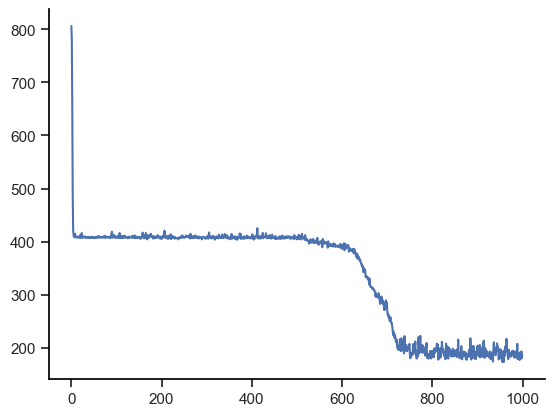

In [717]:
batch_size = 32
n_epochs = 1000
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
lr = 5e-3

epi_model = build_epistemic_model(x_train_scaled.shape[0])

# MSE loss (one unit output)
#epi_model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr))
# negloglik loss (distribution output w/ stdev=1)
epi_model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr), metrics=["mse"])
history = epi_model.fit(x=x_train_scaled, y=y_train, batch_size=batch_size, epochs=n_epochs, verbose=0)#, callbacks=[callback])
plt.plot(range(len(history.epoch)), history.history["mse"])
print(f'Final mse: {history.history["mse"][-1]}')

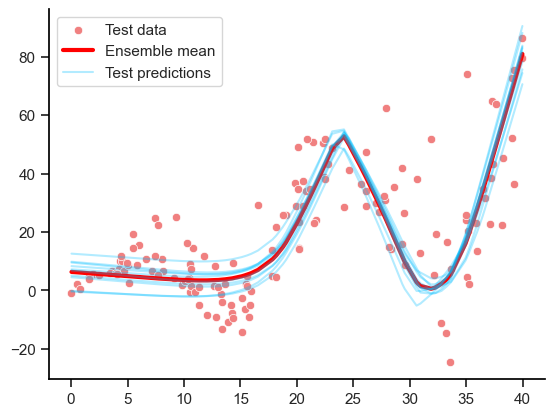

In [719]:
plot_epistemic_uncertainty(
    model=epi_model, x_test=x_test, x_train=x_train, 
    y_test=y_test, y_train=y_train, num_ensembles=10, plot_train=False,
    scale=True
)

### Epistemic and aleatoric

In [660]:
def build_epistemic_al_model(train_size):
    inputs = tf.keras.Input(shape=(1,))
    x = tfp.layers.DenseVariational(
        units=64, make_posterior_fn=posterior_mean_field, make_prior_fn=prior,
        kl_weight=1/train_size,
        activation=tf.nn.elu
    )(inputs)
    x = tfp.layers.DenseVariational(
        units=32, make_posterior_fn=posterior_mean_field, make_prior_fn=prior,
        kl_weight=1/train_size,
        activation=tf.nn.elu
    )(x)
    loc = tfp.layers.DenseVariational(
        units=1, make_posterior_fn=posterior_mean_field, make_prior_fn=prior,
        kl_weight=1/train_size,
    )(x)
    scale = tfp.layers.DenseVariational(
        units=1, make_posterior_fn=posterior_mean_field, make_prior_fn=prior,
        kl_weight=1/train_size,
    )(x)
    output = tfp.layers.DistributionLambda(lambda t: tfp.distributions.Normal(
        loc=t[0], 
        scale=1e-7 + tf.math.softplus(1e-3 * t[1])
    ))([loc, scale])
    model = tf.keras.Model(inputs, output)    
    return model

In [697]:
batch_size = 32
n_epochs = 1000
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
lr = 1e-3

epi_al_model = build_epistemic_model(x_train_scaled.shape[0])

# MSE loss (one unit output)
#epi_model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr))
# negloglik loss (distribution output w/ stdev=1)
epi_al_model.compile(loss=neg_log_likelihood_with_dist, optimizer=tf.keras.optimizers.Adam(lr), metrics=["mse"])
history = epi_al_model.fit(x=x_train_scaled, y=y_train, batch_size=batch_size, epochs=n_epochs, verbose=0)#, callbacks=[callback])
plt.plot(range(len(history.epoch)), history.history["mse"])
print(f'Final mse: {history.history["mse"][-1]}')

ValueError: Data cardinality is ambiguous:
  x sizes: 350
  y sizes: 700
Make sure all arrays contain the same number of samples.

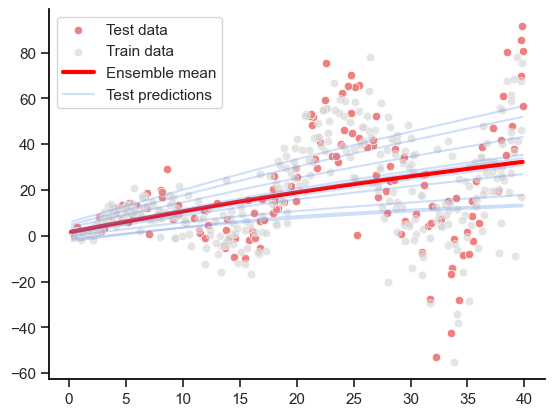

In [688]:
predictions = np.zeros(shape=(num_ensembles, y_test.shape[0]))
for i in range(10):
    predictions[i] = np.squeeze(epi_al_model(x_test_scaled).mean())
sns.scatterplot(x=x_test, y=y_test, color="lightcoral", label="Test data")
sns.scatterplot(x=x_train.squeeze(), y=y_train.squeeze(), color="lightgray", label="Train data", alpha=0.6)
# Plot ensemble mean
sns.lineplot(x=x_test, y=predictions.mean(axis=0), label="Ensemble mean", color="red", linewidth=3)
for i, pred in enumerate(predictions):
    label = "Test predictions" if i == 0 else None
    sns.lineplot(x=x_test, y=pred, color="cornflowerblue", label=label, alpha=0.3)

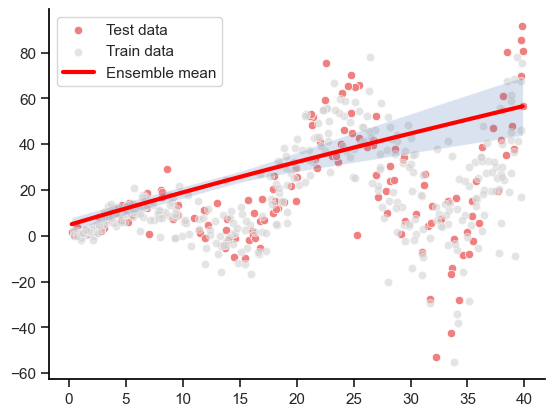

In [678]:
# Challenge: Plot each predictions aleatoric uncertainty with fill_between,
# then plot the epistemic uncertainty using mean predictions of each prediction?

num_ensembles = 10
predictions = [epi_al_model(x_test_scaled)]

sns.scatterplot(x=x_test.squeeze(), y=y_test.squeeze(), color="lightcoral", label="Test data")
sns.scatterplot(x=x_train.squeeze(), y=y_train.squeeze(), color="lightgray", label="Train data", alpha=0.6)
# Plot ensemble mean
avg_mean = np.zeros(shape=y_test.shape)
ind = np.argsort(x_test)
for i, pred in enumerate(predictions):
    label = "Test predictions" if i == 0 else None
    mean = pred.mean()
    st = pred.stddev()
    avg_mean += mean
    aa = sns.lineplot(x=x_test, y=np.squeeze(mean), label="Ensemble mean", color="red", linewidth=3)
    aa.fill_between(
        x_test[ind], 
        np.squeeze(mean + 2*std)[ind],
        np.squeeze(mean - 2*std)[ind],
        alpha=0.2,
    )
    #sns.lineplot(x=x_test, y=np.squeeze(pred), color="cornflowerblue", label=label, alpha=0.3)

## Monte Carlo Markov Chains

### Create toy data and train-test split

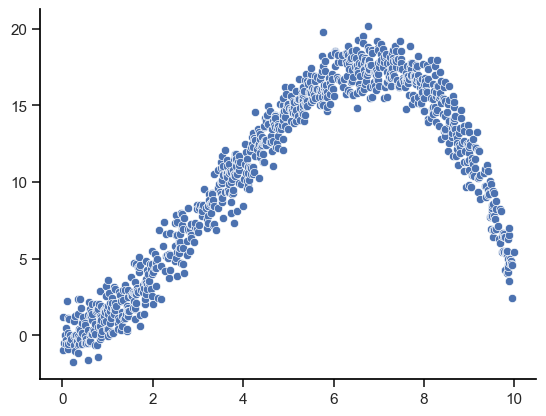

In [730]:
low = 0
high = 10
num_samples = 1000
coeff = 0.4
x_increase = None # Set none if noise should not increase with x
x, y = create_linear_data(low=low, high=high, num_samples=num_samples, coeff=coeff, rng=rng, x_increase=x_increase)
sns.scatterplot(x=x, y=y);

In [731]:
train_size = 0.7
x_train, x_test, y_train, y_test = create_train_test_split(x, y, train_size=train_size)

### Monte Carlo

In [799]:
xs = rng.uniform(-1., 1., [2, 3])
padded = np.pad(xs, [[1, 0], [0, 0]], constant_values=1)
padded

array([[ 1.        ,  1.        ,  1.        ],
       [ 0.89141719, -0.58433482, -0.77081685],
       [-0.80831327,  0.75030518, -0.06342165]])

In [821]:
w = np.array([1., 2., 3.])
linop = tf.linalg.LinearOperatorFullMatrix(w[..., None])
print(f"matmul: Weights {linop.shape} * values {padded.T.shape}")
linop.matmul(padded, adjoint=True).numpy()


matmul: Weights (3, 1) * values (3, 3)


array([[ 0.35789458,  2.08224589, -0.73189865]])

In [814]:
print(linop.H.to_dense())
tf.pad(xs, [[1, 0], [0, 0]], constant_values=1).shape

tf.Tensor([[1. 2. 3.]], shape=(1, 3), dtype=float64)


TensorShape([3, 50])

In [803]:
# Generate some data
def f(x, w):
  # Pad x with 1's so we can add bias via matmul
    x = tf.pad(x, [[1, 0], [0, 0]], constant_values=1)
    linop = tf.linalg.LinearOperatorFullMatrix(w[..., np.newaxis])
    result = linop.matmul(x, adjoint=True)
    return result[..., 0, :]

num_features = 2
num_examples = 50
noise_scale = .5
true_w = np.array([-1., 2., 3.])

xs = np.random.uniform(-1., 1., [num_features, num_examples])
ys = f(xs, true_w) + np.random.normal(0., noise_scale, size=num_examples)

In [830]:
a = tfp.distributions.Dirichlet()

[[2 0 1]
 [3 5 4]
 [7 6 8]]


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [842]:
a = np.arange(6).reshape(2, 3)
a = rng.permuted(a, axis=1)
print(a)
idx = a[1].argsort()
a[0] = a[0, idx]
a[1] = a[1, idx]
a

[[1 2 0]
 [3 5 4]]


array([[1, 0, 2],
       [3, 4, 5]])

In [808]:
xs

array([[ 0.55271433, -0.86145494, -0.02912988,  0.58979862, -0.81985901,
        -0.59318129,  0.49420023,  0.47594007, -0.94602539,  0.24223513,
        -0.31691621,  0.16424993,  0.66304562, -0.43567943, -0.08948955,
        -0.69719501, -0.0843277 ,  0.32229969, -0.26731107,  0.33559644,
        -0.11534817, -0.89123902,  0.44571033,  0.57651143, -0.0619305 ,
         0.83476902,  0.18922774, -0.20010219, -0.30226165, -0.90492981,
        -0.94101807, -0.06322353,  0.57316985, -0.13319586, -0.6247247 ,
         0.42044719,  0.53042974, -0.97291087, -0.55776983,  0.96619806,
        -0.8125024 ,  0.13914374,  0.66365581,  0.03755658,  0.10166525,
         0.11648229, -0.09114749,  0.99284454, -0.87460865,  0.51037451],
       [ 0.13175308, -0.27105947,  0.8288646 ,  0.54618515, -0.9695744 ,
         0.74186045,  0.12061499,  0.08381215,  0.4095253 ,  0.24956168,
        -0.24601457, -0.70802396,  0.3914749 , -0.0827644 , -0.04291251,
         0.4695263 ,  0.88329195,  0.06604442, -0.

## TODOs

* Mail Morten og Sjur: oppdatere begge to om motivasjon for oppgave, oppdatere status.
* 